In [1]:
import pandas as pd

# Load the dataset
file_path = 'data/DR_ML_TTM_data.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,Property ID,TITLE,Property Manager/ Host ID,BEDROOMS,ACCOMMODATES,Airbnb Host URL,Airbnb Listing URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available Nights,Revenue,Revenue Potential,ADR,Occupancy,Cleaning Fee,Property Reviews,Property Rating
0,abnb_188059,"Vineyard Estate: 33 Acres, Private Vineyard + ...",905546,5.0,12.0,https://www.airbnb.com/users/show/905546,https://www.airbnb.com/rooms/188059,5.5,Glen Ellen,True,...,95442,3.0,320,555481,616369.58,2722.946078,0.666667,500.0,50.0,4.900000
1,abnb_282262,Hudson Valley Farm House 5Br 4.5Ba,836724,6.0,16.0,https://www.airbnb.com/users/show/836724,https://www.airbnb.com/rooms/282262,4.5,Hopewell Junction,True,...,12533,2.0,332,429070,446757.79,1292.379518,1.000000,148.0,109.0,4.950000
2,abnb_253507,Blue Sky Mountain Ranch - 120 acres!,1331143,6.0,12.0,https://www.airbnb.com/users/show/1331143,https://www.airbnb.com/rooms/253507,3.0,Black Hawk,False,...,80422,3.0,327,278428,315974.32,1210.556522,0.703364,490.0,124.0,5.000000
3,abnb_287265,Park City Old Town Fun and Convenience,1494302,4.0,16.0,https://www.airbnb.com/users/show/1494302,https://www.airbnb.com/rooms/287265,4.5,Park City,False,...,84060,5.0,336,241352,269278.50,877.643636,0.818452,350.0,191.0,4.884817
4,abnb_61121,Spacious Secluded Luxury Home five min. from V...,295495,4.0,7.0,https://www.airbnb.com/users/show/295495,https://www.airbnb.com/rooms/61121,3.5,Vail,False,...,81657,5.0,328,159549,188816.81,1100.337931,0.611814,300.0,27.0,5.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9039 entries, 0 to 9038
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property ID                9039 non-null   object 
 1   TITLE                      9039 non-null   object 
 2   Property Manager/ Host ID  9039 non-null   object 
 3   BEDROOMS                   9029 non-null   float64
 4   ACCOMMODATES               9031 non-null   float64
 5   Airbnb Host URL            6397 non-null   object 
 6   Airbnb Listing URL         6397 non-null   object 
 7   BATHROOMS                  9035 non-null   float64
 8   CITY_NAME                  9038 non-null   object 
 9   HAS_AIRCON                 9039 non-null   bool   
 10  HAS_GYM                    9039 non-null   bool   
 11  HAS_HOTTUB                 9039 non-null   bool   
 12  HAS_KITCHEN                9039 non-null   bool   
 13  HAS_PARKING                9039 non-null   bool 

Before getting into the data exploration, we will rename the columns with _ instead of spaces. We can also drop all URL columns right off the bat from the dataset as this is not something we can use to predict revenue.

In [3]:
# unnecessary_columns = ['Airbnb Host URL', 'Airbnb Listing URL', 'Vrbo Listing URL', ]
# df.drop(labels=unnecessary_columns, axis=1, inplace=True)

In [4]:
# Rename columns with '_' instead of spaces
df.columns = df.columns.str.replace(' ','_')

# #Performing label encoding
# #No becomes 0 and yes becomes 1.
# from sklearn.preprocessing import LabelEncoder

# # Initialize LabelEncoder
# encoder = LabelEncoder()

# # Loop over the columns in your DataFrame
# for column in df.columns:
#     # Check if the column is boolean (dtype == bool or dtype == 'bool')
#     if df[column].dtype == bool or df[column].dtype == 'bool':
#         # Perform label encoding where 'No' becomes 0 and 'Yes' becomes 1
#         df[column] = encoder.fit_transform(df[column])

In [5]:
df.describe()

,BEDROOMS,ACCOMMODATES,BATHROOMS,LATITUDE,LONGITUDE,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
count,9029.000000,9031.000000,9035.00000,9039.000000,9039.000000,9039.000000,8539.000000,9039.000000,9.039000e+03,9.039000e+03,9018.000000,9039.000000,8269.000000,8334.000000,7104.000000
mean,4.117399,9.648987,3.59264,38.000648,-104.006820,69021.718000,25.876801,229.997455,1.373537e+05,1.757009e+05,1069.034819,0.606500,331.788487,30.409047,4.844740
std,3.484435,7.006193,2.58326,4.162561,16.982566,31145.185266,50.080222,115.113586,1.668225e+05,2.022262e+05,1186.264521,0.233841,276.060835,48.710011,0.410312
min,0.000000,1.000000,0.00000,27.810775,-149.135930,1029.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,2.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,6.000000,2.00000,34.909264,-116.380115,37863.000000,4.000000,128.000000,1.157000e+04,2.677812e+04,269.905594,0.447167,150.000000,2.000000,4.800000
50%,4.000000,8.000000,3.00000,37.940860,-111.501840,84060.000000,10.000000,256.000000,6.260000e+04,9.631200e+04,635.491108,0.607670,265.000000,10.000000,4.950000
75%,5.000000,12.000000,4.50000,40.669616,-83.599128,92253.000000,29.000000,338.000000,2.139170e+05,2.868685e+05,1478.890986,0.776058,450.000000,38.000000,5.000000
max,211.000000,100.000000,30.00000,60.966000,-69.984322,99587.000000,500.000000,365.000000,1.547297e+06,2.045903e+06,10878.575758,1.000000,5000.000000,518.000000,10.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, fixed

# Consolidating the EDA process with an interactive slider
def plot_distribution(data, column):
    if df[column].dtype == 'bool' or df[column].dtype == 'object' or column in ['HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 
                                                                                       'HAS_KITCHEN', 'HAS_PARKING', 
                                                                                       'HAS_PETS_ALLOWED', 'HAS_POOL']:
        # For categorical data
        value_counts = df[column].value_counts()
        plt.figure(figsize=(10, 6))
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        plt.title(f'Distribution of {column}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
    else:
        # For numerical data
        plt.figure(figsize=(10, 6))
        
        sns.boxplot(x=df[column], color='lightgreen')
        plt.title(f'Distribution of {column}')

# List of columns to include in the dropdown
columns_dropdown = ['BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMUM_STAY', 'Available_Nights', 'Revenue', 
                    'Revenue_Potential', 'ADR', 'Occupancy', 'Cleaning_Fee', 'Property_Reviews', 'Property_Rating',
                    'HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN', 'HAS_PARKING', 'HAS_PETS_ALLOWED', 
                    'HAS_POOL', 'INSTANT_BOOK', 'PRICE_TIER', 'STATE_NAME', 'SUPERHOST']

# Creating the interactive plot
interact(plot_distribution, data=fixed(df), column=columns_dropdown);


interactive(children=(Dropdown(description='column', options=('BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMU…

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, fixed

# Consolidating the EDA process with an interactive slider
def plot_distribution(data, column):
    if data[column].dtype == 'bool' or data[column].dtype == 'object' or column in ['HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 
                                                                                   'HAS_KITCHEN', 'HAS_PARKING', 
                                                                                   'HAS_PETS_ALLOWED', 'HAS_POOL']:
        # For categorical data
        value_counts = data[column].value_counts()
        plt.figure(figsize=(10, 6))
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        plt.title(f'Distribution of {column}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
    else:
        # For numerical data
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[column], color='lightgreen')
        plt.title(f'Distribution of {column}')

# Filter the dataset to include only rows where PRICE_TIER is '5. Luxury' or '4. Upscale'
filtered_df = df[df['PRICE_TIER'].isin(['5. Luxury', '4. Upscale'])]

# List of columns to include in the dropdown
columns_dropdown = ['BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMUM_STAY', 'Available_Nights', 'Revenue', 
                    'Revenue_Potential', 'ADR', 'Occupancy', 'Cleaning_Fee', 'Property_Reviews', 'Property_Rating',
                    'HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN', 'HAS_PARKING', 'HAS_PETS_ALLOWED', 
                    'HAS_POOL', 'INSTANT_BOOK', 'PRICE_TIER', 'STATE_NAME', 'SUPERHOST']

# Creating the interactive plot
interact(plot_distribution, data=fixed(filtered_df), column=columns_dropdown);


interactive(children=(Dropdown(description='column', options=('BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMU…

In [8]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5155 entries, 0 to 9037
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property_ID                5155 non-null   object 
 1   TITLE                      5155 non-null   object 
 2   Property_Manager/_Host_ID  5155 non-null   object 
 3   BEDROOMS                   5151 non-null   float64
 4   ACCOMMODATES               5148 non-null   float64
 5   Airbnb_Host_URL            3309 non-null   object 
 6   Airbnb_Listing_URL         3309 non-null   object 
 7   BATHROOMS                  5153 non-null   float64
 8   CITY_NAME                  5154 non-null   object 
 9   HAS_AIRCON                 5155 non-null   bool   
 10  HAS_GYM                    5155 non-null   bool   
 11  HAS_HOTTUB                 5155 non-null   bool   
 12  HAS_KITCHEN                5155 non-null   bool   
 13  HAS_PARKING                5155 non-null   bool 

In [31]:
import numpy as np

# Calculate the 25th percentile of the 'Available_Nights' column
AN_percentile_25 = np.percentile(filtered_df['Available_Nights'], 25)
Rev_percentile_25 = np.percentile(filtered_df['Revenue'], 25)
# Filter out the rows where 'Available_Nights' is greater than or equal to the 25th percentile
filtered_df = filtered_df[filtered_df['Available_Nights'] >= AN_percentile_25]
filtered_df = filtered_df[filtered_df['Revenue'] >= 90000]
filtered_df = filtered_df[filtered_df['Occupancy'] >= .5]
filtered_df = filtered_df[filtered_df['Property_Reviews'] >= 10]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 1 to 9035
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Property_ID                924 non-null    object 
 1   TITLE                      924 non-null    object 
 2   Property_Manager/_Host_ID  924 non-null    object 
 3   BEDROOMS                   924 non-null    float64
 4   ACCOMMODATES               924 non-null    float64
 5   Airbnb_Host_URL            766 non-null    object 
 6   Airbnb_Listing_URL         766 non-null    object 
 7   BATHROOMS                  924 non-null    float64
 8   CITY_NAME                  923 non-null    object 
 9   HAS_AIRCON                 924 non-null    bool   
 10  HAS_GYM                    924 non-null    bool   
 11  HAS_HOTTUB                 924 non-null    bool   
 12  HAS_KITCHEN                924 non-null    bool   
 13  HAS_PARKING                924 non-null    bool  

In [32]:
filtered_df.describe()

,BEDROOMS,ACCOMMODATES,BATHROOMS,LATITUDE,LONGITUDE,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,9.240000e+02,9.240000e+02,924.000000,924.000000,911.000000,924.000000,924.000000
mean,6.076840,14.420996,5.395022,38.109304,-102.426036,66485.255411,4.203463,356.004329,3.335085e+05,3.440936e+05,1478.891934,0.679820,476.444566,68.567100,4.876577
std,2.752236,7.447122,2.825901,3.794726,17.410758,31099.341851,6.382681,9.984386,1.526386e+05,1.583378e+05,688.528712,0.117390,243.399985,58.622365,0.219558
min,1.000000,1.000000,0.000000,28.227347,-123.003134,1240.000000,0.000000,332.000000,9.019800e+04,9.068106e+04,306.033784,0.500000,0.000000,10.000000,3.500000
25%,4.000000,10.000000,3.500000,35.615072,-116.525773,37831.000000,1.750000,350.000000,2.386080e+05,2.475901e+05,1044.134283,0.581156,325.000000,27.000000,4.840741
50%,5.000000,14.000000,4.500000,37.935505,-110.826435,81620.000000,3.000000,360.000000,3.228025e+05,3.315072e+05,1388.909933,0.664740,450.000000,51.000000,4.934808
75%,7.000000,16.000000,6.500000,39.664670,-83.529648,92262.000000,4.000000,365.000000,3.867198e+05,3.972712e+05,1776.420719,0.759998,600.000000,91.000000,5.000000
max,20.000000,88.000000,22.000000,48.904585,-70.093650,98940.000000,31.000000,365.000000,1.512176e+06,1.574330e+06,5953.448819,1.000000,1980.000000,518.000000,8.033333


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, fixed

# Consolidating the EDA process with an interactive slider
def plot_distribution(data, column):
    if data[column].dtype == 'bool' or data[column].dtype == 'object' or column in ['HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 
                                                                                   'HAS_KITCHEN', 'HAS_PARKING', 
                                                                                   'HAS_PETS_ALLOWED', 'HAS_POOL']:
        # For categorical data
        value_counts = data[column].value_counts()
        plt.figure(figsize=(10, 6))
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        plt.title(f'Distribution of {column}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
    else:
        # For numerical data
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[column], color='lightgreen')
        plt.title(f'Distribution of {column}')

# List of columns to include in the dropdown
columns_dropdown = ['BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMUM_STAY', 'Available_Nights', 'Revenue', 
                    'Revenue_Potential', 'ADR', 'Occupancy', 'Cleaning_Fee', 'Property_Reviews', 'Property_Rating',
                    'HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN', 'HAS_PARKING', 'HAS_PETS_ALLOWED', 
                    'HAS_POOL', 'INSTANT_BOOK', 'PRICE_TIER', 'STATE_NAME', 'SUPERHOST']

# Creating the interactive plot
interact(plot_distribution, data=fixed(filtered_df), column=columns_dropdown);


interactive(children=(Dropdown(description='column', options=('BEDROOMS', 'ACCOMMODATES', 'BATHROOMS', 'MINIMU…

## Investigating Revenue


In [12]:
# Assuming df is your DataFrame
zero_revenue_instances = filtered_df[filtered_df['Revenue'] == 0]

# Display instances where revenue is equal to zero
print(zero_revenue_instances)

# Removing rows where revenue is equal to zero
filtered_df = filtered_df[filtered_df['Revenue'] != 0]

Empty DataFrame
Columns: [Property_ID, TITLE, Property_Manager/_Host_ID, BEDROOMS, ACCOMMODATES, Airbnb_Host_URL, Airbnb_Listing_URL, BATHROOMS, CITY_NAME, HAS_AIRCON, HAS_GYM, HAS_HOTTUB, HAS_KITCHEN, HAS_PARKING, HAS_PETS_ALLOWED, HAS_POOL, INSTANT_BOOK, LATITUDE, LONGITUDE, PRICE_TIER, STATE_NAME, SUPERHOST, Vrbo_Listing_URL, ZIPCODE, MINIMUM_STAY, Available_Nights, Revenue, Revenue_Potential, ADR, Occupancy, Cleaning_Fee, Property_Reviews, Property_Rating]
Index: []

[0 rows x 33 columns]


## Investigating the Outlier in Bedrooms

In [13]:
#Looking at the instance where bedrooms is greater than 200.

# Filter the DataFrame to get instances where 'BEDROOMS' is greater than 100
instances_greater_than_100 = df[df['BEDROOMS'] > 100]

# Display the instances where 'BEDROOMS' is greater than 100
print(instances_greater_than_100)

pd.set_option('display.max_colwidth', None)
print(instances_greater_than_100['TITLE'])

#We will need to adjust this data there are 11 bedrooms, not 211.

row_index = df[df['BEDROOMS'] == 211].index[0]  # Assuming '11/9 family compound' is unique
# Update the number of bedrooms for the specific row
df.loc[row_index, 'BEDROOMS'] = 11
df.loc[row_index]

       Property_ID                                              TITLE  \
2417  vrbo_1500291  Stunning fully renovated 11/9 family compound ...   

     Property_Manager/_Host_ID  BEDROOMS  ACCOMMODATES Airbnb_Host_URL  \
2417                   1500291     211.0          18.0             NaN   

     Airbnb_Listing_URL  BATHROOMS  CITY_NAME  HAS_AIRCON  ...  ZIPCODE  \
2417                NaN        9.0  Nantucket        True  ...     2554   

      MINIMUM_STAY  Available_Nights  Revenue  Revenue_Potential     ADR  \
2417           7.0               336   177485           520438.8  5071.0   

     Occupancy  Cleaning_Fee  Property_Reviews Property_Rating  
2417  0.402299         500.0               0.0             NaN  

[1 rows x 33 columns]
2417    Stunning fully renovated 11/9 family compound with pool, walk to town
Name: TITLE, dtype: object


Property_ID                                                                           vrbo_1500291
TITLE                        Stunning fully renovated 11/9 family compound with pool, walk to town
Property_Manager/_Host_ID                                                                  1500291
BEDROOMS                                                                                        11
ACCOMMODATES                                                                                    18
Airbnb_Host_URL                                                                                NaN
Airbnb_Listing_URL                                                                             NaN
BATHROOMS                                                                                        9
CITY_NAME                                                                                Nantucket
HAS_AIRCON                                                                                    True
HAS_GYM   

In [14]:
#Maybe focus on 1 bedroom and up.

zero_bedrooms_instances = df[df['BEDROOMS'] == 0]

# Display instances where revenue is equal to zero
print(zero_bedrooms_instances)


         Property_ID  \
17       abnb_247910   
211   vrbo_9378918ha   
321      vrbo_761984   
394      vrbo_697566   
532      vrbo_444710   
...              ...   
8616   abnb_17572922   
8759   abnb_15567216   
8766   abnb_15395545   
8892   abnb_12765576   
8949   abnb_11442566   

                                                                             TITLE  \
17                                               Casita overlooking Sedona Arizona   
211                                  Marriott''s Mountainside Park City Ski-in/out   
321   Secluded Enclosed Romantic Bungalow (non-condo) w/Exclusive-Use Pool and Spa   
394                   Studio Apt in Ca 1905 walk to Dwntn Asheville 30 Day Minimum   
532            Newly Renovated Studio-Modern Life Style - Few Blocks From El Paseo   
...                                                                            ...   
8616                                                 Ocean breeze studio apartment   
8759                   

## Investigating Accommodates

In [15]:
# Filter the DataFrame to get instances where 'BEDROOMS' is greater than 60
instances_greater_than_60 = df[df['ACCOMMODATES'] >= 60]
print(instances_greater_than_60)

         Property_ID  \
194   vrbo_9488848ha   
214   vrbo_9354721ha   
293      vrbo_793969   
300   vrbo_7883805ha   
572   vrbo_4049845ha   
1354    vrbo_3022770   
1357    vrbo_3020848   
1381    vrbo_2990659   
1715    vrbo_2584333   
1885    vrbo_2414782   
2112    vrbo_2108638   
2199    vrbo_1990963   
2329    vrbo_1717351   
2331    vrbo_1717326   
2333    vrbo_1717285   
2334    vrbo_1717284   
2335    vrbo_1717266   
2337    vrbo_1717258   
2394    vrbo_1552018   
2470    vrbo_1412188   
2515    vrbo_1278142   
2533    vrbo_1222573   

                                                                                                   TITLE  \
194                  Mountain Castle: VIEWS, Indoor Pool, Home Theater, Top Amenities, near Attractions!   
214   Smoky Mountain Retreat: Spectacular Views! Top Amenities, Perfect for Large Groups, Best Location!   
293                                                Bachelor Gulch, Outdoor Hot Tub & Fire Pit, Mt Views    
300            

In [16]:
# Filter the DataFrame to get instances where 'BEDROOMS' is greater than 60
zero_instances = df[df['ACCOMMODATES'] <= 1]
print(zero_instances)

                   Property_ID  \
391                vrbo_701831   
1484              vrbo_2843050   
1541              vrbo_2791725   
2213              vrbo_1960061   
2678   abnb_988697956071139762   
...                        ...   
8942             abnb_11623804   
8959             abnb_11258524   
8996  abnb_1025760927282340253   
9018  abnb_1011184055834581884   
9027  abnb_1006603966249956793   

                                                                            TITLE  \
391                                        Near El Paseo Hiking, Biking and Golf    
1484  Super-Comfy Space, Furnished, Awesome Views, LIGHT, a Deck, Newly Renovated   
1541        TRAVELLING PROFESSIONALS ONLY   - 3.3 miles to Winter Haven Hospital!   
2213                           Downtown Breck Overlooking the River-Mountain Chic   
2678                                              Private/Single room/ Near strip   
...                                                                           ...

## Investigating Bathrooms

In [17]:
## Investigating Available Nights

In [18]:
# Filter the DataFrame to get instances where 'BEDROOMS' is greater than 60
zero_instances = df[df['Available_Nights'] <= 200]
print(zero_instances)

# We will drop these instances as they are outliers with revenue as well.
df = df[df['Available_Nights'] > 8]

                   Property_ID  \
9                   abnb_74642   
14                  abnb_57810   
15                 abnb_167723   
16                 abnb_225376   
17                 abnb_247910   
...                        ...   
9033  abnb_1002530662644460137   
9034  abnb_1001569855289413290   
9036  abnb_1001026923945672009   
9037  abnb_1000999544746839349   
9038  abnb_1000863209508965871   

                                                   TITLE  \
9      Pet/Kid-Friendly WFH 3BR Cabin (Monthly/Seasonal)   
14       Mid-Century Modern Style - Country Club Privacy   
15     Private, spacious, ground floor Carson/Reno/Tahoe   
16      ROMANTIC OPEN-BEAM CABIN FIREPLACE DIRECT GARAGE   
17                     Casita overlooking Sedona Arizona   
...                                                  ...   
9033                         Modern Home in Indian Wells   
9034  Family-Friendly Steamboat Springs Home w/ Hot Tub!   
9036     Desert Oasis | Pool | Hot Tub | Game Room 

## Duplicates

In [19]:
df['Property_Manager/_Host_ID'].value_counts()

Vacasa                   114
Evolve                   106
Palm Desert Vacation      48
WY Vacation               44
Desert Luxury Estates     42
                        ... 
693050                     1
7388876ha                  1
2206859                    1
60348510                   1
1455697                    1
Name: Property_Manager/_Host_ID, Length: 6943, dtype: int64

In [20]:
import pandas as pd

# Assuming df is your original DataFrame

# Get the value counts of Property_Manager/_Host_ID
property_manager_counts = df['Property_Manager/_Host_ID'].value_counts()

# Filter the property managers with 3 or more occurrences
selected_property_managers = property_manager_counts[property_manager_counts >= 3].index

# Create a new DataFrame with only the selected property managers
duplicate_check_df = df[df['Property_Manager/_Host_ID'].isin(selected_property_managers)]

# Now filtered_df contains only the rows where the Property_Manager/_Host_ID has 3 or more occurrences


In [21]:
duplicate_check_df

,Property_ID,TITLE,Property_Manager/_Host_ID,BEDROOMS,ACCOMMODATES,Airbnb_Host_URL,Airbnb_Listing_URL,BATHROOMS,CITY_NAME,HAS_AIRCON,...,ZIPCODE,MINIMUM_STAY,Available_Nights,Revenue,Revenue_Potential,ADR,Occupancy,Cleaning_Fee,Property_Reviews,Property_Rating
10,abnb_247079,Eco Designer 4BR With Perfect Indoor-Outdoor Livin,Green Palm Springs Rentals,4.0,7.0,https://www.airbnb.com/users/show/1273155,https://www.airbnb.com/rooms/247079,2.0,Cathedral City,True,...,92234,29.0,330,28003,31594.18,307.725275,0.541667,349.0,171.0,4.922222
255,vrbo_881553,Sail Away - Lakefront - TLUXP,Tahoe Luxury Properties,3.0,6.0,NaN,NaN,3.0,Carnelian Bay,False,...,96140,0.0,279,193124,240647.45,1005.854167,0.695652,400.0,7.0,5.000000
306,vrbo_777606,"Grand Oaks RR4 -Mountain Views, Echota on the Ridge Gated Resort, Indoor/Outdoor Pools and Hot Tu...",Foscoe Rentals,3.0,6.0,NaN,NaN,3.0,Banner Elk,True,...,28604,30.0,360,60213,60946.72,257.320513,0.650000,90.0,41.0,4.900000
324,vrbo_7594966ha,"Free Tickets, Arcade Games, Private Indoor Pool, Huge Deck with Views!",RentBranson,12.0,50.0,NaN,NaN,14.5,Branson,True,...,65616,0.0,356,258642,263736.53,1261.668293,0.575843,539.0,34.0,4.900000
373,vrbo_712740,Chalakee Lodge CD1/Close to High Country Attractions/Gated Resort/Pools - Last minute Discount av...,Foscoe Rentals,1.0,2.0,NaN,NaN,1.0,Boone,True,...,28607,99.0,67,11239,15257.99,184.245902,0.910448,40.0,28.0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9018,abnb_1011184055834581884,Master room Near to strip & airport,89452799,1.0,1.0,https://www.airbnb.com/users/show/89452799,https://www.airbnb.com/rooms/1011184055834581884,1.5,Las Vegas,True,...,89118,8.0,38,360,360.00,72.000000,0.714286,80.0,1.0,5.000000
9027,abnb_1006603966249956793,Room 1 with shared bathroom,518656328,1.0,1.0,https://www.airbnb.com/users/show/518656328,https://www.airbnb.com/rooms/1006603966249956793,1.0,Las Vegas,True,...,89115,32.0,46,651,3197.21,93.000000,0.318182,70.0,1.0,5.000000
9028,abnb_1006600488745076234,Mountaintop Hideaway @ OldHopLodge - Private Pool!,310597847,6.0,16.0,https://www.airbnb.com/users/show/310597847,https://www.airbnb.com/rooms/1006600488745076234,7.0,Sevierville,True,...,37862,8.0,47,35492,35492.00,1868.000000,0.904762,350.0,NaN,NaN
9030,abnb_1005118523016349065,"Sanctuary at Skyline, Jackson Hole Property Mgmt",25794988,4.0,8.0,https://www.airbnb.com/users/show/25794988,https://www.airbnb.com/rooms/1005118523016349065,4.5,Jackson,False,...,83001,14.0,80,11200,14934.18,1600.000000,0.179487,750.0,0.0,NaN


In [22]:
# Count the number of unique hosts in the filtered DataFrame
unique_hosts_count = duplicate_check_df['Property_Manager/_Host_ID'].nunique()

print("Number of unique hosts:", unique_hosts_count)


Number of unique hosts: 265


In [23]:
# Group the DataFrame by 'Property_Manager/_Host_ID' and 'TITLE', then count the number of entries in each group
title_counts = duplicate_check_df.groupby(['Property_Manager/_Host_ID', 'TITLE']).size()

# Filter for groups where the count of entries is greater than 1
duplicate_titles = title_counts[title_counts > 1]

# Print the instances where a host has entries with the same title
print("Instances where a host has entries with the same title:")
print(duplicate_titles)


Instances where a host has entries with the same title:
Property_Manager/_Host_ID         TITLE                                             
232444430                         Private/Single room/ Near strip                       2
50573299                          $7 Million Aspen Residence Brand New Construction     2
                                  $9 Million Aspen Residence Brand New Construction     2
                                  $9 Million Aspen Residence Walk to Town & Skiing      2
AvantStay                         Hacienda at Coachella by AvantStay | Gorgeous Home    2
Blue Pacific Vacation Rentals     3Nts Spcl Prez Wknd, Hit the Slopes, New Home Pics    2
Doug                              ❤️Wyndham Grand Desert-2 BDRM/2 BATH Deluxe Unit❤️    2
                                  ❤️Wyndham Smoky Mountains-2BDRM 2BTH Luxury Unit❤️    3
InvitedHome                       Ritz Residence, Hot Tub, Pool | By InvitedHome        2
Luxury Mountain Destinations LLC  Steps to skiing

In [24]:
# Get the list of duplicate titles by property manager host
duplicate_titles_index = duplicate_titles.index

# Iterate through the groups of duplicate titles
for index in duplicate_titles_index:
    property_manager_host, title = index
    # Get the rows corresponding to the duplicate titles for the specific property manager host and title
    duplicate_rows = duplicate_check_df[(duplicate_check_df['Property_Manager/_Host_ID'] == property_manager_host) & (duplicate_check_df['TITLE'] == title)]
    
    # Display the property manager host and title
    print("Property Manager / Host:", property_manager_host)
    print("Title:", title)
    
    # Get the common columns among duplicate rows
    common_columns = duplicate_rows.columns[duplicate_rows.nunique() == 1]
    print("Common Columns:", common_columns.tolist())
    
    # Get the differing columns among duplicate rows
    differing_columns = duplicate_rows.columns[duplicate_rows.nunique() > 1]
    print("Differing Columns:")
    for column in differing_columns:
        print(column, ":", duplicate_rows[column].tolist())
    
    print("\n")


Property Manager / Host: 232444430
Title: Private/Single room/ Near strip
Common Columns: ['TITLE', 'Property_Manager/_Host_ID', 'BEDROOMS', 'ACCOMMODATES', 'Airbnb_Host_URL', 'CITY_NAME', 'HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN', 'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'PRICE_TIER', 'STATE_NAME', 'SUPERHOST', 'MINIMUM_STAY', 'Cleaning_Fee']
Differing Columns:
Property_ID : ['abnb_988697956071139762', 'abnb_988668689134897878']
Airbnb_Listing_URL : ['https://www.airbnb.com/rooms/988697956071139762', 'https://www.airbnb.com/rooms/988668689134897878']
BATHROOMS : [1.0, 1.5]
INSTANT_BOOK : [True, False]
LATITUDE : [36.101852707, 36.10309065]
LONGITUDE : [-115.243873757, -115.242638596]
ZIPCODE : [89147, 89103]
Available_Nights : [122, 92]
Revenue : [2616, 2810]
Revenue_Potential : [2616.0, 2810.0]
ADR : [39.63636363636363, 39.02777777777778]
Occupancy : [0.7252747252747253, 0.8]
Property_Reviews : [3.0, 2.0]
Property_Rating : [3.65, 4.5]


Property Manager / Host: 50573

Property Manager / Host: InvitedHome
Title: Ritz Residence, Hot Tub, Pool | By InvitedHome
Common Columns: ['TITLE', 'Property_Manager/_Host_ID', 'BEDROOMS', 'ACCOMMODATES', 'Airbnb_Host_URL', 'CITY_NAME', 'HAS_AIRCON', 'HAS_GYM', 'HAS_HOTTUB', 'HAS_KITCHEN', 'HAS_PARKING', 'HAS_PETS_ALLOWED', 'HAS_POOL', 'INSTANT_BOOK', 'PRICE_TIER', 'STATE_NAME', 'SUPERHOST', 'ZIPCODE', 'MINIMUM_STAY', 'Cleaning_Fee', 'Property_Rating']
Differing Columns:
Property_ID : ['abnb_589984782031730826', 'abnb_46129104']
Airbnb_Listing_URL : ['https://www.airbnb.com/rooms/589984782031730826', 'https://www.airbnb.com/rooms/46129104']
BATHROOMS : [4.5, 5.0]
LATITUDE : [39.64229, 39.64156]
LONGITUDE : [-106.39463, -106.39187]
Vrbo_Listing_URL : ['https://www.vrbo.com/9691106ha', 'https://www.vrbo.com/9520218ha']
Available_Nights : [312, 291]
Revenue : [509202, 375708]
Revenue_Potential : [546609.1699999999, 546512.3]
ADR : [3372.198675496689, 3873.278350515464]
Occupancy : [0.5571955719557196, 0.423580786026200

In [25]:
#Performing label encoding
#No becomes 0 and yes becomes 1.
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Loop over the columns in your DataFrame
for column in df.columns:
    # Check if the column is boolean (dtype == bool or dtype == 'bool')
    if df[column].dtype == bool or df[column].dtype == 'bool':
        # Perform label encoding where 'No' becomes 0 and 'Yes' becomes 1
        df[column] = encoder.fit_transform(df[column])

<ipython-input-25-7660119691c1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = encoder.fit_transform(df[column])


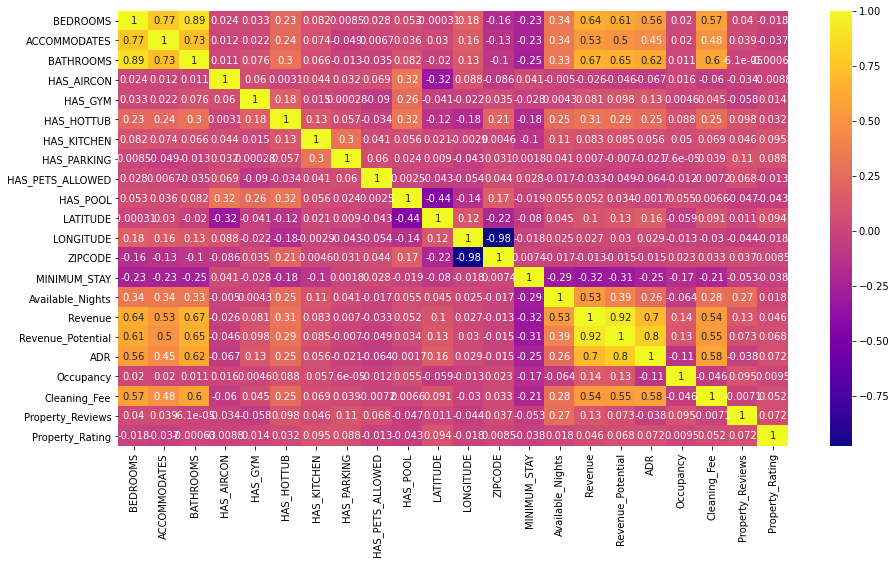

In [26]:
# Correlation analysis

fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(df.select_dtypes('number').corr(),annot=True,cmap='plasma');

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Assuming df is your DataFrame containing variables including 'revenue'

# Get the list of variables that share high correlation with revenue
high_corr_vars = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'Revenue']

# Define a dropdown widget to select variables
variable_dropdown = widgets.Dropdown(options=high_corr_vars, description='Select Variable:')

# Define a function to update the plot based on the selected variable
def update_plot(selected_variable):
    plt.figure(figsize=(10, 6))
    if df[selected_variable].dtype == 'float64' or df[selected_variable].dtype == 'int64':
        sns.scatterplot(x=selected_variable, y='Revenue', data=df)
        plt.title(f'Scatter plot of {selected_variable} vs Revenue')
    elif df[selected_variable].dtype == 'object':
        sns.boxplot(x=selected_variable, y='Revenue', data=df)
        plt.title(f'Box plot of {selected_variable} vs Revenue')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.xlabel(selected_variable)
    plt.ylabel('Revenue')
    plt.show()

# Display the dropdown widget and plot

widgets.interactive(update_plot, selected_variable=variable_dropdown)


interactive(children=(Dropdown(description='Select Variable:', options=('BEDROOMS', 'ACCOMMODATES', 'BATHROOMS…